### Exercise 1: Basic image processing

##### (a)

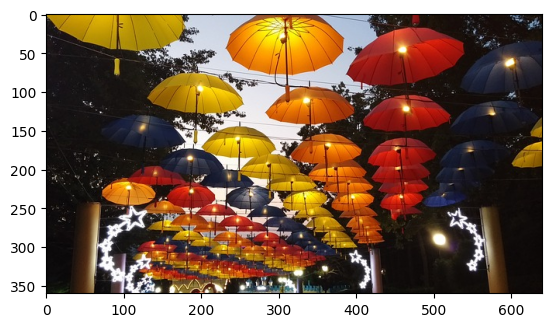

In [1]:
from UZ_utils import *
I = imread('images/umbrellas.jpg')
imshow(I)


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
height, width, channels = I.shape

##### (b)

In [4]:
#najprej so vrstice
#potem so stolpci
#potem piksli in sicer barve v pikslu
#sepravi pride tako:
# I[y, x, barva]
#kar je tudi rekel na predavanjih/vajah - da je najprej y in potem x in da naj pazimo

In [5]:
I_gray = (I[:,:,0]+I[:,:,1]+I[:,:,2])/3

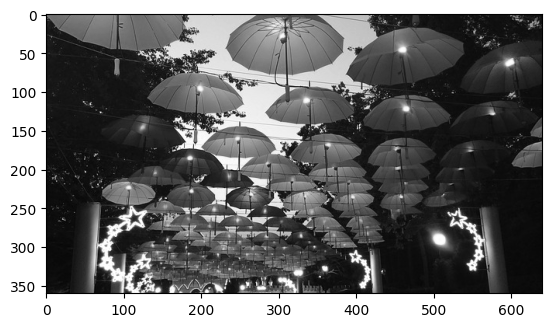

In [6]:
#test
plt.imshow(I_gray, cmap="gray")
plt.show()

##### (c)

In [7]:
cutout=I[130:260, 240:450, 1]

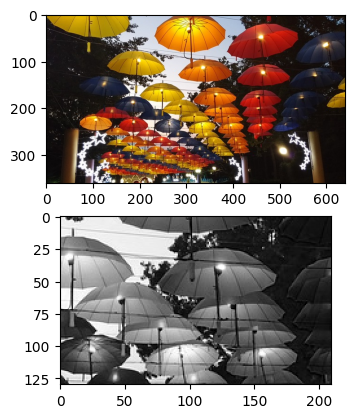

In [8]:
#test
plt.subplot(2,1,1)
plt.imshow(I)
plt.subplot(2,1,2)
plt.imshow(cutout,cmap="gray")
plt.show()


> Question: Why would you use different color maps?

To control the color scheme of the visualization, which can significantly alter its interpretation and effectiveness. 
To accommodate different needs, wether it be those of the data - driven by interpretation (the importance of contrast, the continuity of the data, application specifics, avoiding misinterpretation); or those of the viewer - colorblindness (using color maps distinguishable for people with color blindness).

##### (d)

In [9]:
#make a copy of the image so as to preserve the original
I_with_inversion = np.copy(I)
#define the cutout area to be inverted
y_start_cut, y_end_cut = 130, 260 
x_start_cut, x_end_cut = 240, 450
#invert each color channel in the cutout area
for channel in range(I_with_inversion.shape[2]):
    I_with_inversion[y_start_cut:y_end_cut, x_start_cut:x_end_cut, channel] = 1 - I_with_inversion[y_start_cut:y_end_cut, x_start_cut:x_end_cut, channel]

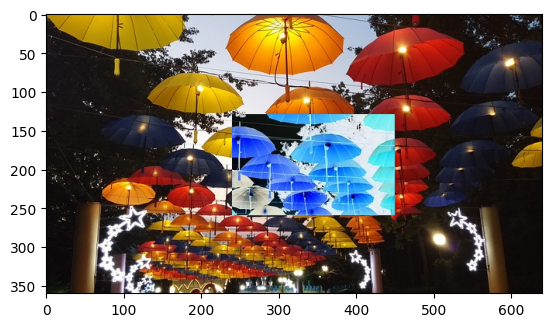

In [10]:
#test
plt.imshow(I_with_inversion)
plt.show()

> Question: How is inverting a grayscale value defined?

Inversion is done by swapping the existing color pixel value with the difference between it and the maximum value (or to put it simply by subtracting the pixel value from the maximum). This is done for each color channel. If the image is in grayscale, there are no color channels - just the pixel value(s) - so this only needs to be done once (the principle remains the same).

##### (e)

In [11]:
#rescale
I_gray_rescaled = I_gray * 0.3

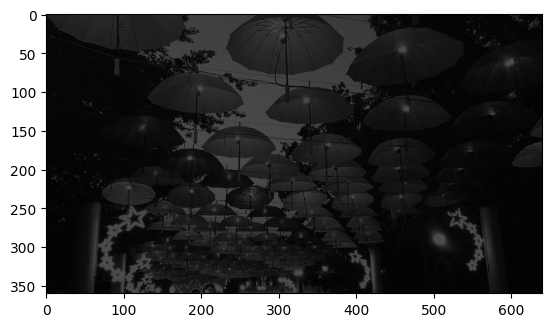

In [12]:
#display
plt.imshow(I_gray_rescaled, cmap="gray", vmin=0, vmax=1)
plt.show()

#### Exercise 2: Thresholding and histograms

##### (a)

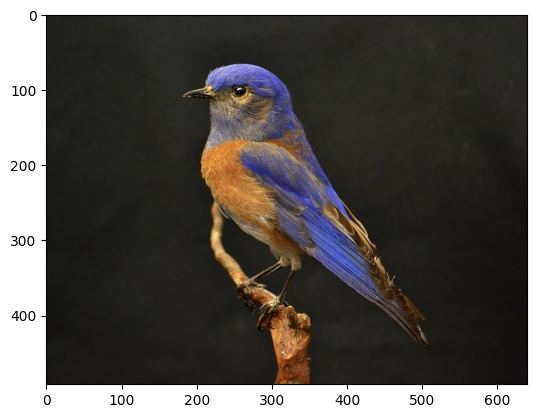

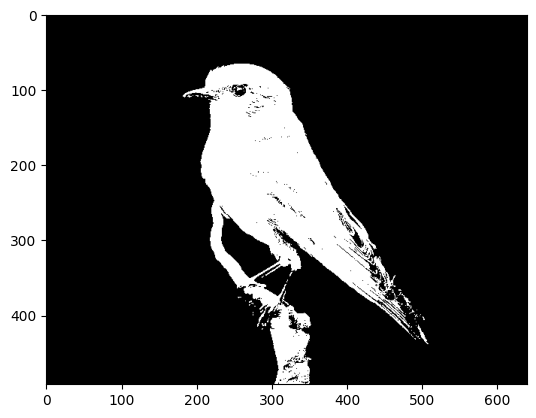

In [13]:
#read bird image
I_bird = imread('images/bird.jpg')
plt.imshow(I_bird)
plt.show()
#convert to grayscale
I_bird_gray = (I_bird[:,:,0]+I_bird[:,:,1]+I_bird[:,:,2])/3 
#create binary mask
I_bird_mask = np.copy(I_bird_gray)
threshold = 0.2
#first method
#I_bird_mask[I_bird_mask < threshold] = 0
#I_bird_mask[I_bird_mask >= threshold] = 1
#second method
I_bird_mask = np.where(I_bird_mask < threshold, 0, 1)
#show img
plt.imshow(I_bird_mask, cmap="gray")
plt.show()

Experimenting revealed that lowering the threshold from 0.3 towards 0.2 eliminates more and more of the black dots/holes in the object. Lowering it bellow 0.2 introduces white spots on the background.

##### (b)

In [14]:
def myhist(img, bins):
    H = np.zeros(bins)
    # print("st. binov: ",bins)
    bin_range = 1/bins #how wide a bin stretches
    # print("bin range: ", bin_range)
    img = img.reshape(-1)
    # print("1d image vector length: ", img.shape)
    # print("len H: ", len(H))
    #iterate over the pixels
    for pix in img:
        #place the pixel in a bin
        bin_index = int(pix/bin_range)
        if(bin_index == bins): bin_index-= 1 # the last interval has to include the end value as well
        H[bin_index] += 1
    #normalize
    # print("H before norm: ", H)
    H = H / img.shape[0]
    # print("H after norm: ", H)
    return H
        

> Question: The histograms are usually normalized by dividing the result by the
sum of all cells. Why is that?

It reflects the shape of the distribution rather than the absolute counts of values. It makes interpretation, and comparison between histograms, easier. It also simplifies many statistical operations.

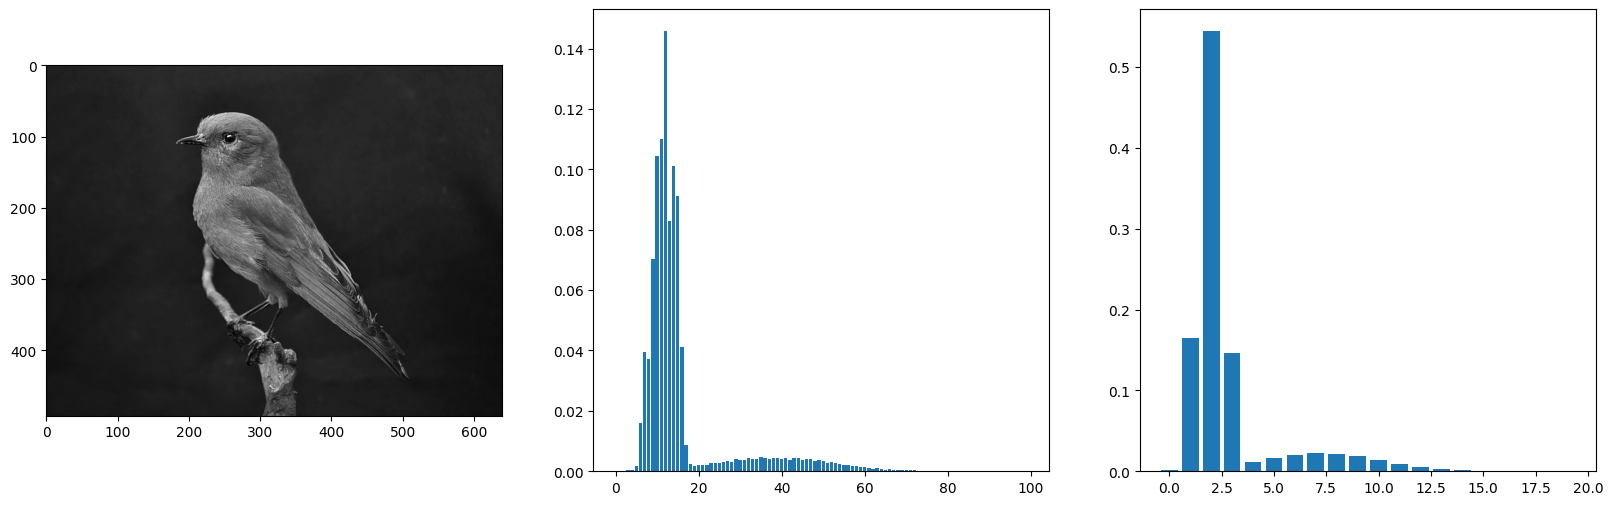

In [15]:
bird_hist_1 = myhist(I_bird_gray, 100)
bird_hist_2 = myhist(I_bird_gray, 20)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(I_bird_gray, cmap="gray")
plt.subplot(1,3,2)
plt.bar(range(len(bird_hist_1)), bird_hist_1)
plt.subplot(1,3,3)
plt.bar(range(len(bird_hist_2)),bird_hist_2)
plt.show()

##### (c)

In [16]:
def myhist_mod(img, bins):
    H = np.zeros(bins)
    max_val = np.max(img)
    min_val = np.min(img)
    bin_range = (max_val-min_val)/bins 
    img = img.reshape(-1)
    for pix in img:
        val = (pix-min_val)
        bin_index = int(val/bin_range)
        if(bin_index == bins): bin_index-= 1
        # if(int(val/bin_range) == bins):
        #     print(max_val)
        #     print(min_val)
        #     print(bin_range)
        #     print(pix)
        #     print(val)
        #     print(val/bin_range)
        #     print(bin_index)
        #     print()
        H[bin_index] += 1
    H = H / img.shape[0]
    return H

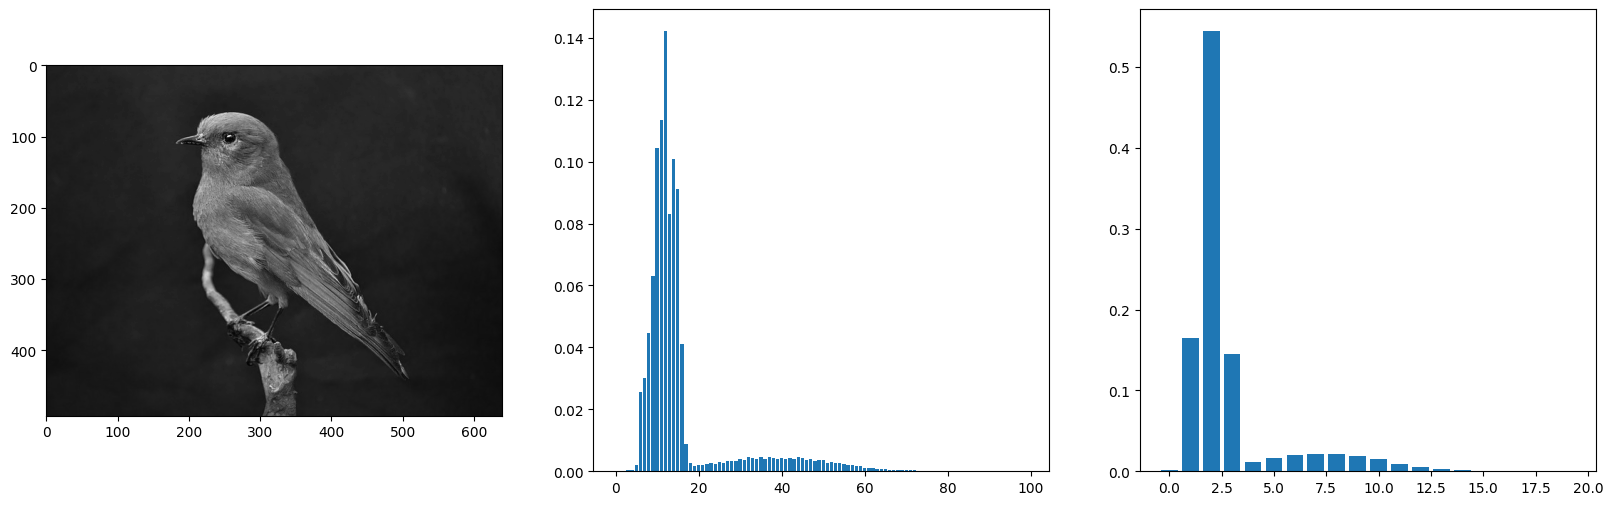

In [17]:
bird_hist_3 = myhist_mod(I_bird_gray, 100)
bird_hist_4 = myhist_mod(I_bird_gray, 20)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(I_bird_gray, cmap="gray")
plt.subplot(1,3,2)
plt.bar(range(len(bird_hist_3)), bird_hist_3)
plt.subplot(1,3,3)
plt.bar(range(len(bird_hist_4)),bird_hist_4)
plt.show()

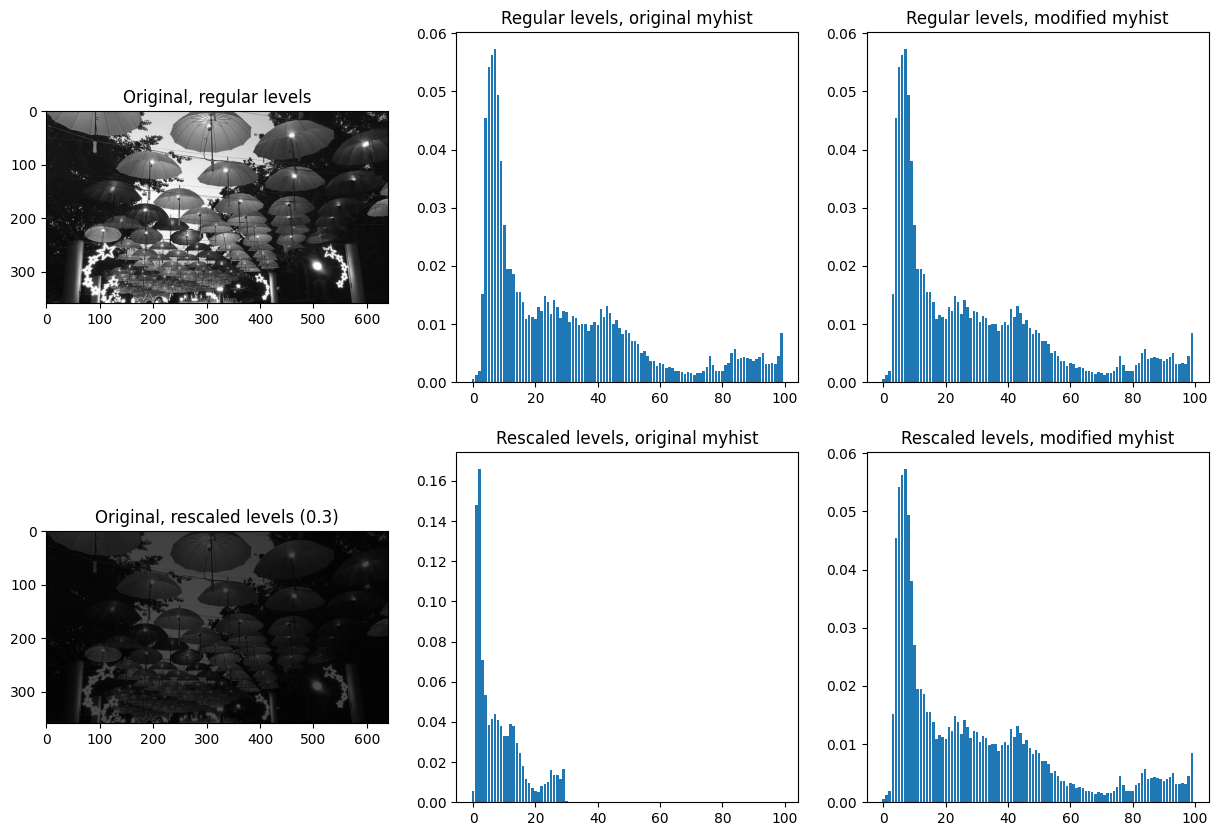

In [18]:
#showing the difference between both versions of the function
#we can take the grayscale umbrella images from earlier

#calculate histograms
test_2e_c_n = 100
test_2e_c_h1 = myhist(I_gray,test_2e_c_n) #regular levels, original function
test_2e_c_h2 = myhist(I_gray_rescaled,test_2e_c_n) #rescaled levels, original function
test_2e_c_h3 = myhist_mod(I_gray,test_2e_c_n) #regular levels, modified function
test_2e_c_h4 = myhist_mod(I_gray_rescaled,test_2e_c_n) #rescaled levels, modified function

#plot everything
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(I_gray, cmap="gray")
plt.title("Original, regular levels")
plt.subplot(2,3,4)
plt.imshow(I_gray_rescaled, cmap="gray", vmin=0, vmax=1)
plt.title("Original, rescaled levels (0.3)")
plt.subplot(2,3,2)
plt.bar(range(len(test_2e_c_h1)), test_2e_c_h1)
plt.title("Regular levels, original myhist")
plt.subplot(2,3,3)
plt.bar(range(len(test_2e_c_h3)), test_2e_c_h3)
plt.title("Regular levels, modified myhist")
plt.subplot(2,3,5)
plt.bar(range(len(test_2e_c_h2)), test_2e_c_h2)
plt.title("Rescaled levels, original myhist")
plt.subplot(2,3,6)
plt.bar(range(len(test_2e_c_h4)), test_2e_c_h4)
plt.title("Rescaled levels, modified myhist")
plt.show()

##### (d)

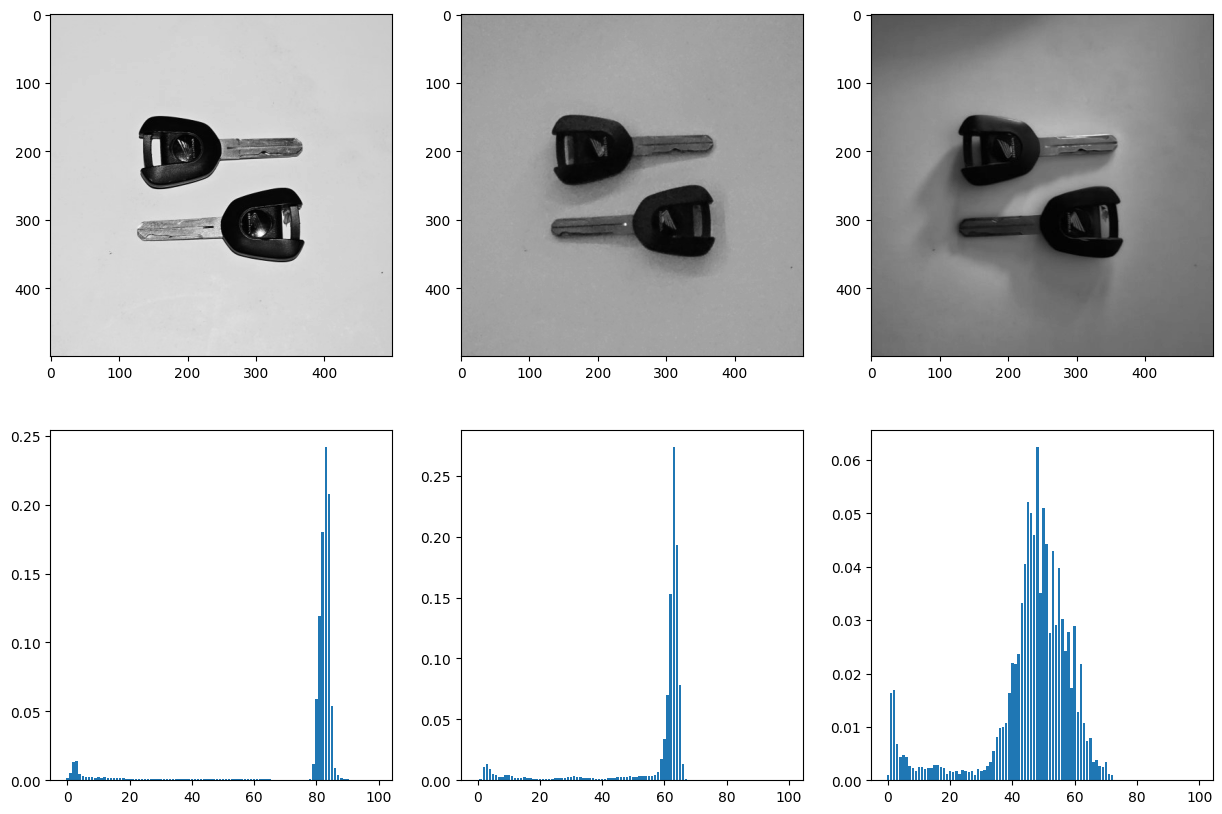

In [19]:
#open images
lighting1 = imread('captures/lighting1.jpg')
lighting2 = imread('captures/lighting2.jpg')
lighting3 = imread('captures/lighting3.jpg')

#convert to grayscale
lighting1 = (lighting1[:,:,0]+lighting1[:,:,1]+lighting1[:,:,2])/3
lighting2 = (lighting2[:,:,0]+lighting2[:,:,1]+lighting2[:,:,2])/3
lighting3 = (lighting3[:,:,0]+lighting3[:,:,1]+lighting3[:,:,2])/3

#test parameters
func_to_use = myhist_mod
test_2e_d_n = 100

#calculate histograms
test_2e_d_l1_hist = func_to_use(lighting1, test_2e_d_n)
test_2e_d_l2_hist = func_to_use(lighting2, test_2e_d_n)
test_2e_d_l3_hist = func_to_use(lighting3, test_2e_d_n)

#plot
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(lighting1, cmap="gray")
plt.subplot(2,3,2)
plt.imshow(lighting2, cmap="gray")
plt.subplot(2,3,3)
plt.imshow(lighting3, cmap="gray")
plt.subplot(2,3,4)
plt.bar(range(len(test_2e_d_l1_hist)), test_2e_d_l1_hist)
plt.subplot(2,3,5)
plt.bar(range(len(test_2e_d_l2_hist)), test_2e_d_l2_hist)
plt.subplot(2,3,6)
plt.bar(range(len(test_2e_d_l3_hist)), test_2e_d_l3_hist)
plt.show()

##### (e)

In [20]:
def otsu(image):
    
    #init
    T = 0 #threshold
    max_var = 0 #max variance

    #histogram
    histogram = myhist_mod(image,256)

    
    #iterate over possible threshold values
    for t in range(0,256):

        prob_of_bg = histogram[:t].sum() #probability of a pixel being in the background
        prob_of_fg = histogram[t:].sum() #probability of a pixel being in the foreground
        
        if(prob_of_bg == 0 or prob_of_fg == 0): continue #skip iteration (current threshold) if one class is empty

        mean_val_bg = (np.arange(0,t) * histogram[:t]).sum() / prob_of_bg #mean value of background class
        mean_val_fg = (np.arange(t,255+1) * histogram[t:]).sum() / prob_of_fg #mean value of foreground class

        bet_class_var = prob_of_bg * prob_of_fg * (mean_val_bg - mean_val_fg)**2 #between class variance

        if(bet_class_var > max_var):
            #if true we have a new best candidate for threshold
            max_var = bet_class_var
            T = t
    

    return T

In [21]:
#wikipedia implementation - deprecated in this file
# def otsu2(image):

#     #max_possible_t = np.max(image)
#     candidates_t = []

#     for t in range(0,256):
#         temp_im = np.copy(image)
#         temp_im[image < t] = 0
#         temp_im[image >= t] = 1

#         n2 = np.count_nonzero(temp_im) #number of pixels larger or equal than threshold
#         n1 = image.size-n2
#         w1 = n1/image.size
#         w2 = n2/image.size

#         if(n1 == 0 or n2 == 0): continue #threshold is invalid if one class is empty; skip to next iteration

#         pixs_in_bg = image[temp_im == 0]
#         pixs_in_fg = image[temp_im == 1]

#         bg_variance = np.var(pixs_in_bg)
#         fg_variance = np.var(pixs_in_fg)

#         var = w1 * bg_variance + w2 * fg_variance

#         candidates_t.append((t, var))

#     T = -1
#     max_var = 1000000000 #lets assume it wont exceed this...
#     for i in candidates_t:
#         if(i[1] < max_var):
#             max_var = i[1]
#             T = i[0]
    
#     return T

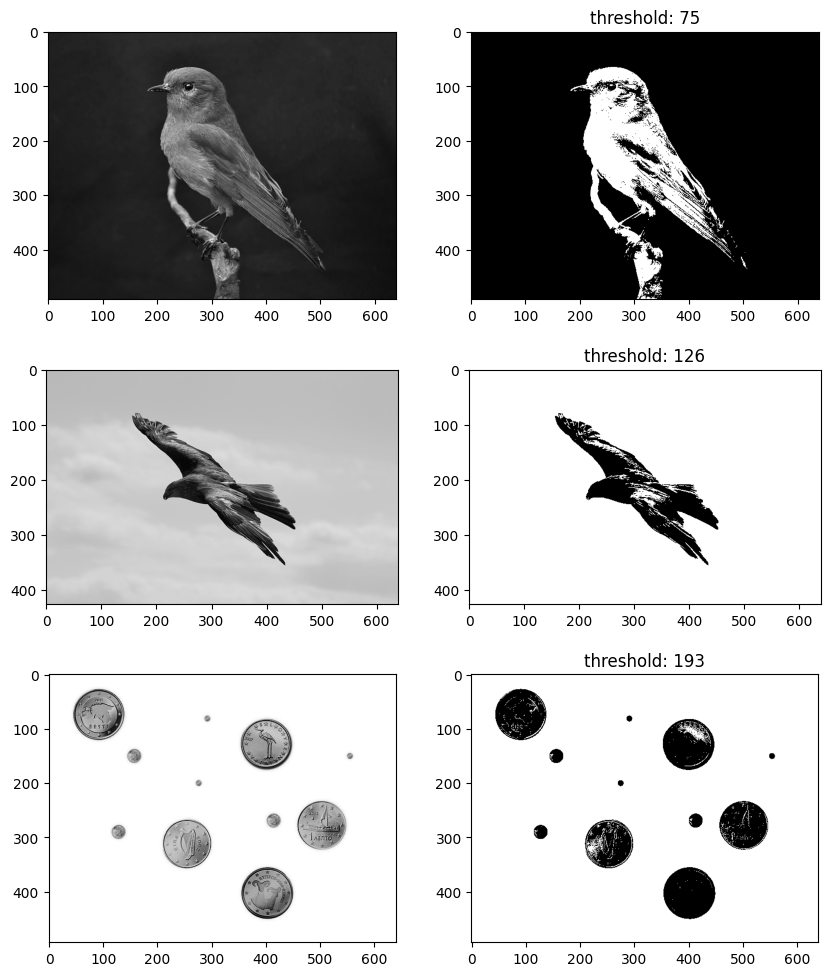

In [22]:
#otsu results on different images

test_2e_e_img1 = cv2.imread('images/bird.jpg', cv2.IMREAD_GRAYSCALE)
test_2e_e_img2 = cv2.imread('images/eagle.jpg', cv2.IMREAD_GRAYSCALE)
test_2e_e_img3 = cv2.imread('images/coins.jpg', cv2.IMREAD_GRAYSCALE)

test_2e_e_th_1 = otsu(test_2e_e_img1)
test_2e_e_th_2 = otsu(test_2e_e_img2)
test_2e_e_th_3 = otsu(test_2e_e_img3)

test_2e_e_mask1 = np.where(test_2e_e_img1 < test_2e_e_th_1, 0, 1)
test_2e_e_mask2 = np.where(test_2e_e_img2 < test_2e_e_th_2, 0, 1)
test_2e_e_mask3 = np.where(test_2e_e_img3 < test_2e_e_th_3, 0, 1)

plt.figure(figsize=(10,16))
plt.subplot(4,2,1)
plt.imshow(test_2e_e_img1, cmap="gray")
plt.subplot(4,2,3)
plt.imshow(test_2e_e_img2, cmap="gray")
plt.subplot(4,2,5)
plt.imshow(test_2e_e_img3, cmap="gray")
plt.subplot(4,2,2)
plt.imshow(test_2e_e_mask1, cmap="gray")
plt.title("threshold: {}".format(test_2e_e_th_1))
plt.subplot(4,2,4)
plt.imshow(test_2e_e_mask2, cmap="gray")
plt.title("threshold: {}".format(test_2e_e_th_2))
plt.subplot(4,2,6)
plt.imshow(test_2e_e_mask3, cmap="gray")
plt.title("threshold: {}".format(test_2e_e_th_3))
plt.show()

#### Exercise 3: Morphological operations and regions

##### (a)

In [23]:
#read image
I_mask = imread('images/mask.png')
I_mask = (I_mask[:,:,0]+I_mask[:,:,1]+I_mask[:,:,2])/3 #to grayscale

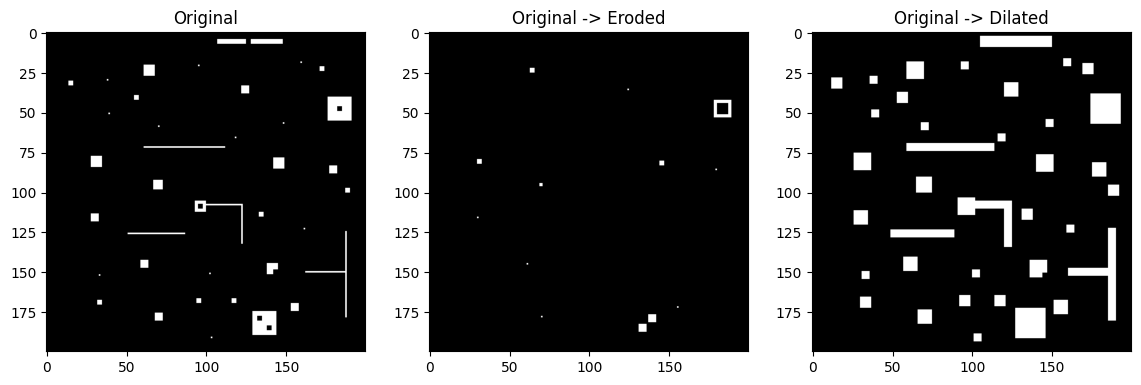

In [24]:
n = 5
SE = np.ones((n,n)) # create a square structuring element
I_eroded = cv2.erode(I_mask, SE)
I_dilated = cv2.dilate(I_mask, SE)

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.imshow(I_mask, cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(I_eroded, cmap="gray")
plt.title("Original -> Eroded")
plt.subplot(1,3,3)
plt.imshow(I_dilated, cmap="gray")
plt.title("Original -> Dilated")
plt.show()

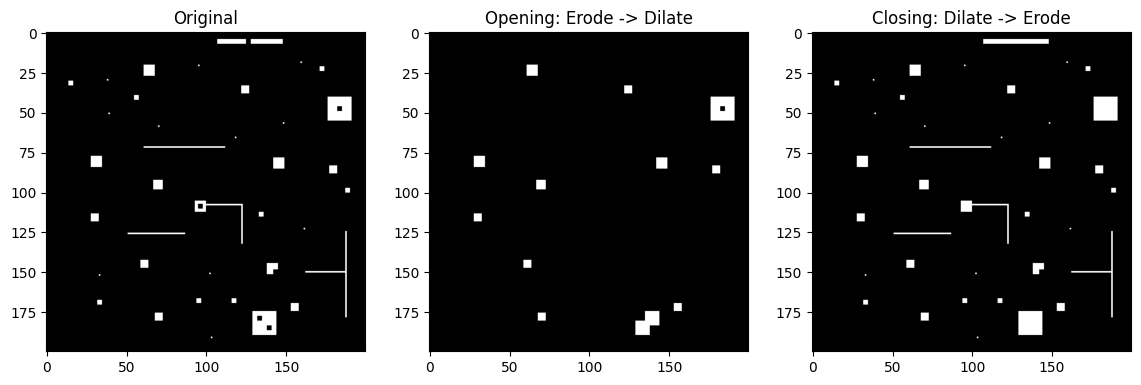

In [25]:
mask_se_n = 5
SE = np.ones((mask_se_n,mask_se_n)) # create a square structuring element
I_opening = cv2.erode(I_mask, SE)
I_opening = cv2.dilate(I_opening, SE)
I_closing = cv2.dilate(I_mask, SE)
I_closing = cv2.erode(I_closing, SE)

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.imshow(I_mask, cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(I_opening, cmap="gray")
plt.title("Opening: Erode -> Dilate")
plt.subplot(1,3,3)
plt.imshow(I_closing, cmap="gray")
plt.title("Closing: Dilate -> Erode")
plt.show()


> Question: Based on the results, which order of erosion and dilation operations
produces opening and which closing?

Erosion first and then dilation produces opening. <br>
Dilation first and then erosion produces closing.

##### (b)

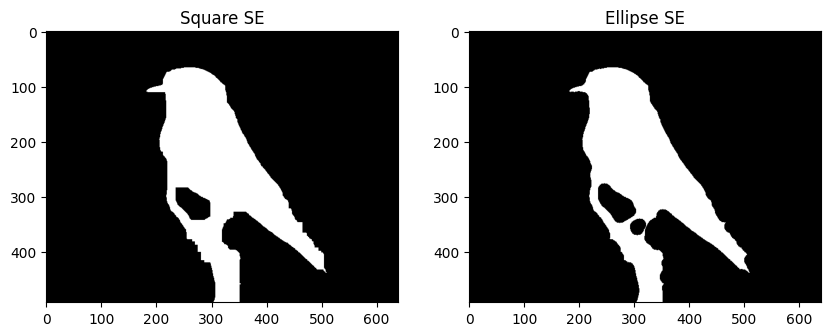

In [26]:
bird_se_n = 23
bird_SE_sqr = np.ones((bird_se_n,bird_se_n)) #square se-
I_bird_mask_sq_se = I_bird_mask.astype(np.uint8) #it doesnt like int32, this is also more efficient
I_bird_mask_sq_se = cv2.dilate(I_bird_mask_sq_se, bird_SE_sqr)
I_bird_mask_sq_se = cv2.erode(I_bird_mask_sq_se, bird_SE_sqr)

bird_SE_elip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(bird_se_n,bird_se_n)) #ellipse se
I_bird_mask_el_se = I_bird_mask.astype(np.uint8)
I_bird_mask_el_se = cv2.dilate(I_bird_mask_el_se, bird_SE_elip)
I_bird_mask_el_se = cv2.erode(I_bird_mask_el_se, bird_SE_elip)

# I_bird_mask_el_se = cv2.erode(I_bird_mask_el_se, bird_SE_elip)
# I_bird_mask_el_se = cv2.dilate(I_bird_mask_el_se, bird_SE_elip)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I_bird_mask_sq_se, cmap="gray")
plt.title("Square SE")
plt.subplot(1,2,2)
plt.imshow(I_bird_mask_el_se, cmap="gray")
plt.title("Ellipse SE")
plt.show()

##### (c)

In [27]:
def immask(image, mask):
    result = np.copy(image)
    my_mask = np.expand_dims(mask, axis=2)
    my_mask = np.tile(my_mask, (1,1,3))
    result[my_mask == 0] = 0
    return result

    

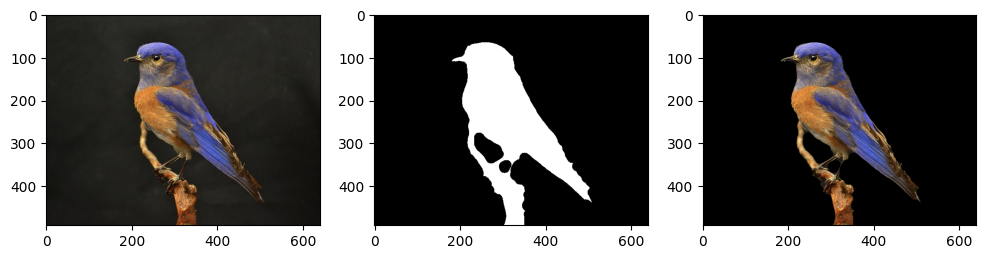

In [28]:
test_e3_c = immask(I_bird, I_bird_mask_el_se)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(I_bird)
plt.subplot(1,3,2)
plt.imshow(I_bird_mask_el_se, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(test_e3_c)
plt.show()

##### (d)

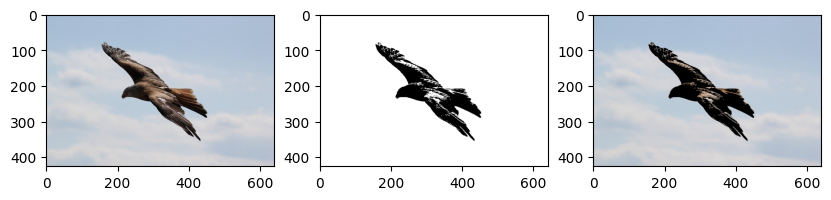

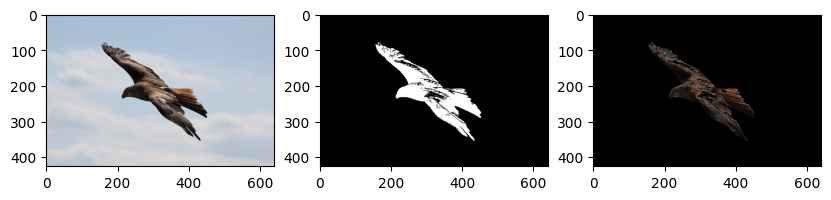

In [29]:
#open image
I_eagle = cv2.imread('images/eagle.jpg')
I_eagle = cv2.cvtColor(I_eagle, cv2.COLOR_BGR2RGB)
# I_eagle = inverted_image = cv2.bitwise_not(I_eagle)
#convert to grayscale
I_eagle_gray = cv2.cvtColor(I_eagle, cv2.COLOR_RGB2GRAY)
#create mask
threshold_eagle = otsu((I_eagle_gray))
I_eagle_mask = np.where(I_eagle_gray < threshold_eagle, 0, 1)
#visualize
I_eagle_masked = immask(I_eagle,I_eagle_mask)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(I_eagle)
plt.subplot(1,3,2)
plt.imshow(I_eagle_mask, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(I_eagle_masked)
plt.show()

#attempt to fix

I_eagle_gray = 255 - I_eagle_gray
threshold_eagle = otsu((I_eagle_gray))
I_eagle_mask = np.where(I_eagle_gray < threshold_eagle, 0, 1)
I_eagle_masked = immask(I_eagle,I_eagle_mask)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(I_eagle)
plt.subplot(1,3,2)
plt.imshow(I_eagle_mask, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(I_eagle_masked)
plt.show()


> Question: Why is the background included in the mask and not the object? How
would you fix that in general? (just inverting the mask if necessary doesn’t count)

In this case, the lighter colors are assumed as the object and the darker colors are assumed as the background. We could fix this when applying the mask by setting the pixels that are lower than the threshold to 1 instead of 0, but this is effectively inverting the mask. We can also fix this by inverting the image before creating the mask. In general, the solution depends on the application and having domain knowledge helps (for example if we know that we will have a dark object on light background or vice versa).


##### (e)

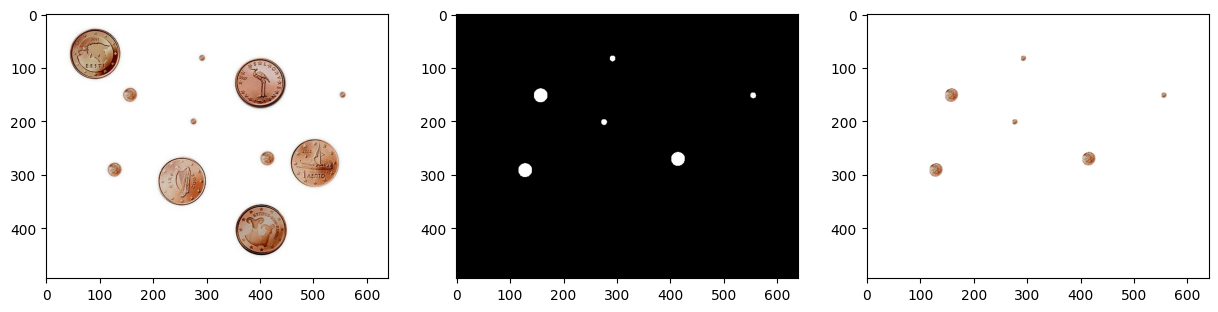

In [30]:
#open image and make grayscale version
I_coins = cv2.imread('images/coins.jpg')
I_coins = cv2.cvtColor(I_coins, cv2.COLOR_BGR2RGB)
I_coins_gray = cv2.cvtColor(I_coins, cv2.COLOR_BGR2GRAY)

#make binary mask

#threshold with otsu
threshold_coins = otsu(I_coins_gray)
I_coins_mask = np.where(I_coins_gray < threshold_coins, 1, 0) #invert mask because we have dark(ish) objects on white background
#opening
coins_SE_n = 10
coins_SE = np.ones((coins_SE_n, coins_SE_n))
#coins_SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(coins_SE_n,coins_SE_n)) #alternative SE
I_coins_mask = cv2.dilate(I_coins_mask.astype(np.uint8),coins_SE)
I_coins_mask = cv2.erode(I_coins_mask, coins_SE)

#cv2 magic
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(I_coins_mask)
# print(retval)
# imshow(labels)
# print(stats)
# print(centroids)

#get areas and remove >700px
diameters = stats[:,cv2.CC_STAT_AREA] #select column with areas
for i in range(len(diameters)):
    if(diameters[i] > 700): labels[labels == i] = 0


#make new mask from labels
I_coins_mask = np.copy(labels)
I_coins_mask[I_coins_mask > 0] = 1 #make mask binary again

#and apply it to the image
I_coins_masked = np.copy(I_coins)
I_coins_masked[np.tile(np.expand_dims(I_coins_mask, axis=2), (1,1,3)) == 0] = 255

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(I_coins)
plt.subplot(1,3,2)
plt.imshow(I_coins_mask, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(I_coins_masked)
plt.show()